In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from scipy.fftpack import fft

import warnings
warnings.filterwarnings('ignore')

In [142]:
%run classes/music.py
%run classes/measure.py
%run classes/note.py

In [143]:
musicA = Music()
musicA.read('sounds/wav/cello_pluck/single/a3.wav')

musicC = Music()
musicC.read('sounds/wav/cello_pluck/single/d3.wav')

In [144]:
notesA = musicA.find_peaks(window=10, resolution=40000, SIGMA=10)
notesA = [musicA.chan1[notesA[i]: notesA[i] + 30000] for i in range(len(notesA))]

notesC = musicC.find_peaks(window=10, resolution=40000, SIGMA=10)
notesC = [musicC.chan1[notesC[i]: notesC[i] + 30000] for i in range(len(notesC))]

A, octave: 3, actual pitch: 214.4Hz, ideal pitch: 220.0Hz


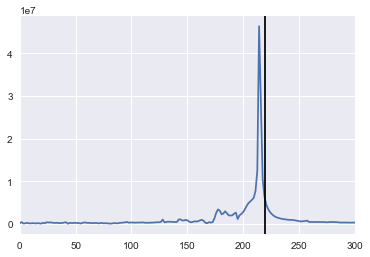

In [153]:
f_data = np.abs(fft(notesA[0]))
conversion_factor = musicA.sample_rate / len(f_data)
x = [i * conversion_factor for i in range(len(f_data))]

note = Note(f_data.argmax() * conversion_factor)
note.describe()

plt.plot(x, f_data)
plt.xlim(0, 300)
_ = plt.axvline(note.given_pitch, color="k")

C#, octave: 3, actual pitch: 142.4Hz, ideal pitch: 138.59Hz


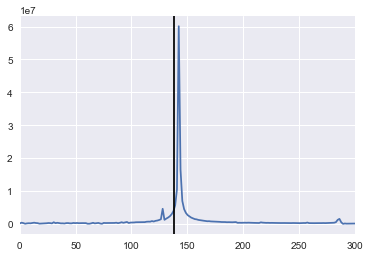

In [154]:
f_data = np.abs(fft(notesC[0]))
conversion_factor = musicC.sample_rate / len(f_data)
x = [i * conversion_factor for i in range(len(f_data))]

note = Note(f_data.argmax() * conversion_factor)
note.describe()

plt.plot(x, f_data)
plt.xlim(0, 300)
_ = plt.axvline(note.given_pitch, color="k")